<a href="https://colab.research.google.com/github/GergelyTuri/context-project/blob/main/notebooks/pcb_experiments/AT_merged_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import plotly.graph_objs as go
from google.colab import drive
import numpy as np
import plotly.graph_objects as go

drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!pip install kaleido
!pip install -U kaleido

In [32]:
# Load data from both CSV files
mob_df = pd.read_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/mobility_pcb_nia2.csv')
serotonin_df = pd.read_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/serotonin_df_pcb_nia2.csv')

print(mob_df)
print(serotonin_df)

       mob  Time (s)
0        0      0.00
1        0      0.05
2        0      0.10
3        0      0.15
4        0      0.20
...    ...       ...
98839    0   4997.50
98840    0   4997.55
98841    0   4997.60
98842    0   4997.65
98843    0   4997.70

[98844 rows x 2 columns]
            Time (s)   Z-score
0           8.000962 -2.403905
1           8.001945 -2.400462
2           8.002928 -2.397641
3           8.003912 -2.395427
4           8.004895 -2.393826
...              ...       ...
5076657  4998.557760  3.955360
5076658  4998.558743  3.953285
5076659  4998.559726  3.951307
5076660  4998.560709  3.949454
5076661  4998.561692  3.947785

[5076662 rows x 2 columns]


In [27]:
# Downsample the serotonin_df
def downsample(df, factor):
    return df.iloc[::factor, :].reset_index(drop=True)

# Adjust the downsample factor as needed
downsample_factor = 1000
serotonin_df_downsampled = downsample(serotonin_df, downsample_factor)

# Print the size of the downsampled dataframe
print("Original size:", len(serotonin_df))
print("Downsampled size:", len(serotonin_df_downsampled))
print(serotonin_df_downsampled)

Original size: 5485238
Downsampled size: 5486
         Time (s)   Z-score
0        8.000962 -1.353613
1        8.984002 -1.318812
2        9.967042 -1.373479
3       10.950082 -1.203086
4       11.933122 -1.226782
...           ...       ...
5481  5396.043095  2.710028
5482  5397.026135  2.790547
5483  5398.009175  2.516646
5484  5398.992215  2.770001
5485  5399.975255  2.576196

[5486 rows x 2 columns]


In [ ]:
#overlay serotonin signal on mobility
from datetime import datetime
# Function to convert time to seconds
def time_to_seconds(time_str):
    time_obj = datetime.strptime(time_str, '%I:%M:%S%p')
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
start_time_seconds = time_to_seconds('10:52:44am')
injection_time_seconds = time_to_seconds('11:21:31am')
clap1_time_seconds = time_to_seconds('11:46:31am')
clap2_time_seconds = time_to_seconds('11:53:24am')
clap3_time_seconds = time_to_seconds('12:00:43pm')
clap4_time_seconds = time_to_seconds('12:07:56pm')
clap5_time_seconds = time_to_seconds('12:15:41pm')
stop_time_seconds = time_to_seconds('12:22:44pm')

injection_relative_time = injection_time_seconds - start_time_seconds

clap1_relative_time = clap1_time_seconds - start_time_seconds
clap2_relative_time = clap2_time_seconds - start_time_seconds
clap3_relative_time = clap3_time_seconds - start_time_seconds
clap4_relative_time = clap4_time_seconds - start_time_seconds
clap5_relative_time = clap5_time_seconds - start_time_seconds

# Print the size of the downsampled dataframe
print("Original size:", len(serotonin_df))
print("Downsampled size:", len(serotonin_df_downsampled))

# Create an overlay plot using Plotly
fig = go.Figure()

# Add the mobility dataset trace
fig.add_trace(go.Scatter(x=mob_df['Time (s)'], y=mob_df['mob'], mode='lines', name='Mobility'))

# Add the downsampled serotonin Z-score dataset trace
fig.add_trace(go.Scatter(x=serotonin_df_downsampled['Time (s)'], y=serotonin_df_downsampled['Z-score'], mode='lines', name='Z-score (serotonin - ISOS)', yaxis='y2'))

# Add a vertical line for the injection time
fig.add_vline(x=injection_relative_time, line_width=2, line_dash="dash", line_color="red", annotation_text="Injection", annotation_position="top")
fig.add_vline(x=clap1_relative_time, line_width=2, line_dash="dash", line_color="green", annotation_text="Clap 1", annotation_position="top")
fig.add_vline(x=clap2_relative_time, line_width=2, line_dash="dash", line_color="green", annotation_text="Clap 2", annotation_position="top")
fig.add_vline(x=clap3_relative_time, line_width=2, line_dash="dash", line_color="green", annotation_text="Clap 3", annotation_position="top")
fig.add_vline(x=clap4_relative_time, line_width=2, line_dash="dash", line_color="green", annotation_text="Clap 4", annotation_position="top")
fig.add_vline(x=clap5_relative_time, line_width=2, line_dash="dash", line_color="green", annotation_text="Clap 5", annotation_position="top")

fig.update_layout(
    title='Overlay of Mobility and Serotonin Z-score Over Time',
    xaxis_title='Time (s)',
    yaxis_title='Mobility',
    xaxis=dict(range=[0, stop_time_seconds - start_time_seconds]),
    yaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['Mobile', 'Immobile']),
    yaxis2=dict(title='Z-score', overlaying='y', side='right'),
    legend=dict(x=0, y=1.1, orientation='h')
)

# Show plot
fig.show()


# Save the immobile plot as a PNG file with 300 DPI resolution
fig.write_image('/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/drug_experiment-240625-124323/plots/nia11_pcb_overlay_plot_.png', format='png', scale=3)

# Save the immobile plot as an SVG file
fig.write_image('/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/drug_experiment-240625-124323/plots/nia11_pcb_overlay_plot.svg', format='svg')

Original size: 5485238
Downsampled size: 5486


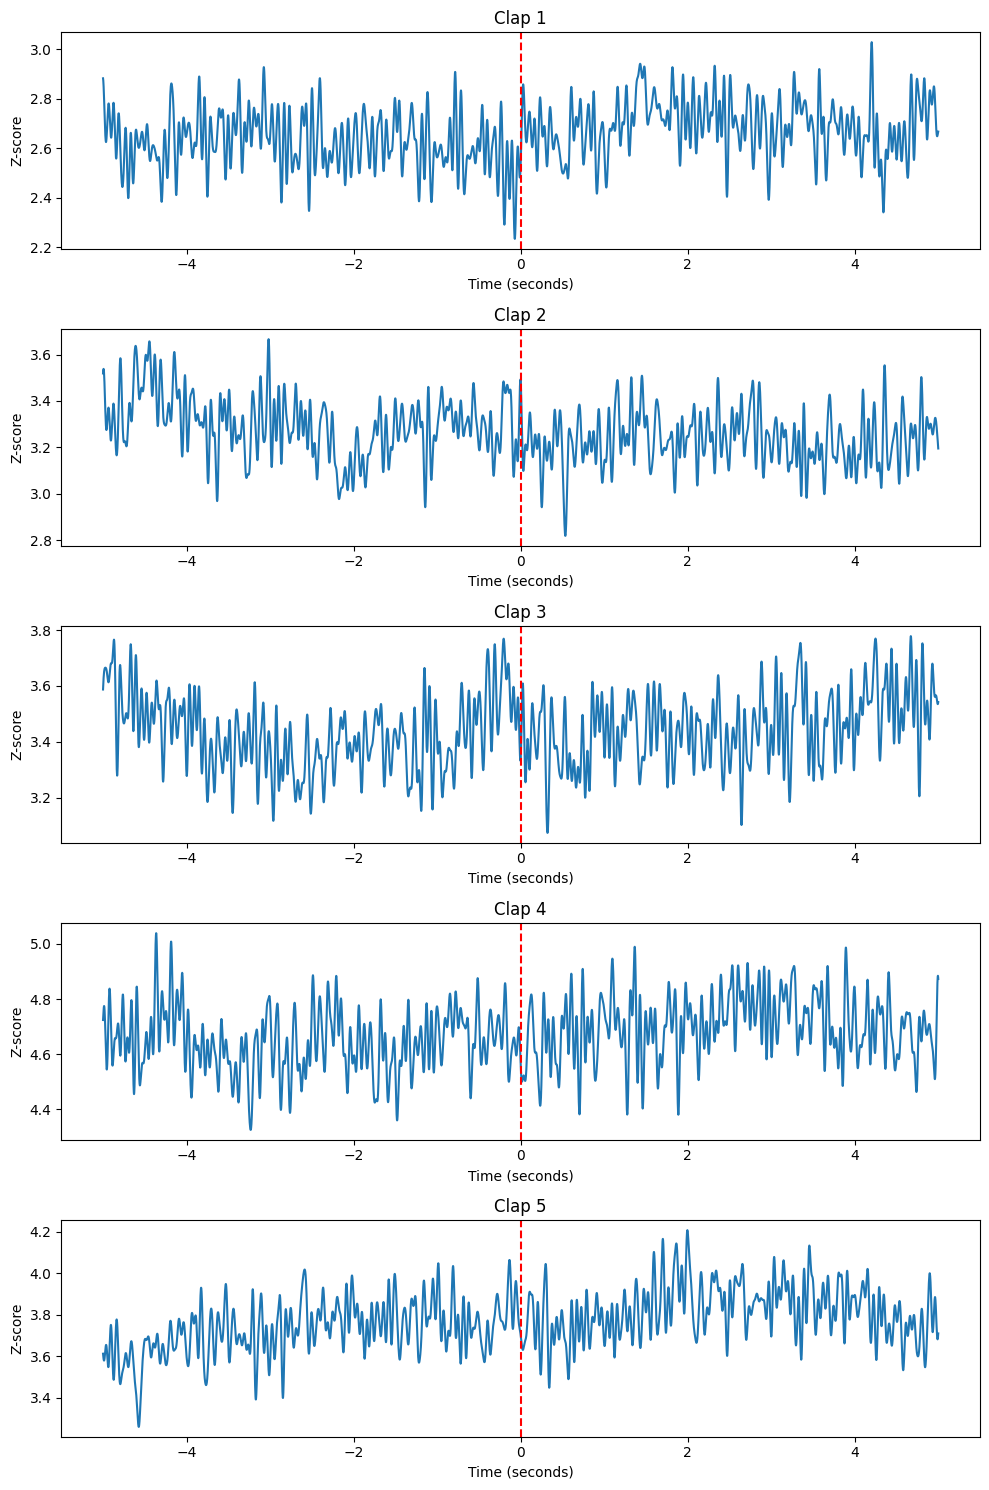

In [33]:
#zooming in on claps

# Function to convert time to seconds
def time_to_seconds(time_str):
    time_obj = datetime.strptime(time_str, '%I:%M:%S%p')
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

# Clap event times
start_time_seconds = time_to_seconds('9:43:48am')
clap1_time_seconds = time_to_seconds('10:29:35am')
clap2_time_seconds = time_to_seconds('10:36:06am')
clap3_time_seconds = time_to_seconds('10:43:07am')
clap4_time_seconds = time_to_seconds('10:50:20am')
clap5_time_seconds = time_to_seconds('10:57:02am')

# Calculate relative times
clap1_relative_time = clap1_time_seconds - start_time_seconds
clap2_relative_time = clap2_time_seconds - start_time_seconds
clap3_relative_time = clap3_time_seconds - start_time_seconds
clap4_relative_time = clap4_time_seconds - start_time_seconds
clap5_relative_time = clap5_time_seconds - start_time_seconds

# Function to subset data around clap events
def subset_data_around_clap(df, clap_time, window=5):
    return df[(df['Time (s)'] >= clap_time - window) & (df['Time (s)'] <= clap_time + window)]

# Subset data for each clap event
serotonin_clap1 = subset_data_around_clap(serotonin_df, clap1_relative_time)
serotonin_clap2 = subset_data_around_clap(serotonin_df, clap2_relative_time)
serotonin_clap3 = subset_data_around_clap(serotonin_df, clap3_relative_time)
serotonin_clap4 = subset_data_around_clap(serotonin_df, clap4_relative_time)
serotonin_clap5 = subset_data_around_clap(serotonin_df, clap5_relative_time)

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

# Plot each subset
axes[0].plot(serotonin_clap1['Time (s)'] - clap1_relative_time, serotonin_clap1['Z-score'])
axes[0].axvline(x=0, color='r', linestyle='--')
axes[0].set_title('Clap 1')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Z-score')

axes[1].plot(serotonin_clap2['Time (s)'] - clap2_relative_time, serotonin_clap2['Z-score'])
axes[1].axvline(x=0, color='r', linestyle='--')
axes[1].set_title('Clap 2')
axes[1].set_xlabel('Time (seconds)')
axes[1].set_ylabel('Z-score')

axes[2].plot(serotonin_clap3['Time (s)'] - clap3_relative_time, serotonin_clap3['Z-score'])
axes[2].axvline(x=0, color='r', linestyle='--')
axes[2].set_title('Clap 3')
axes[2].set_xlabel('Time (seconds)')
axes[2].set_ylabel('Z-score')

axes[3].plot(serotonin_clap4['Time (s)'] - clap4_relative_time, serotonin_clap4['Z-score'])
axes[3].axvline(x=0, color='r', linestyle='--')
axes[3].set_title('Clap 4')
axes[3].set_xlabel('Time (seconds)')
axes[3].set_ylabel('Z-score')

axes[4].plot(serotonin_clap5['Time (s)'] - clap5_relative_time, serotonin_clap5['Z-score'])
axes[4].axvline(x=0, color='r', linestyle='--')
axes[4].set_title('Clap 5')
axes[4].set_xlabel('Time (seconds)')
axes[4].set_ylabel('Z-score')

plt.tight_layout()
plt.show()


In [ ]:
#average serotonin level mobile vs immobile

# Display the first few rows of the dataframes to ensure they are loaded correctly
print("Mobility DataFrame:")
print(mob_df.head())

print("\nSerotonin DataFrame:")
print(serotonin_df.head())

# Round the 'Time (s)' values in serotonin_df to match the frame rate intervals in mob_df
serotonin_df['Time (s)'] = serotonin_df['Time (s)'].round(2)

# Merge the dataframes on the 'Time (s)' column
merged_df = pd.merge(mob_df, serotonin_df, on='Time (s)', how='inner')

# Display the first few rows of the merged dataframe
print("\nMerged DataFrame:")
print(merged_df.head())

# Calculate the average serotonin level for mobile and immobile states
average_serotonin_mobile = merged_df[merged_df['mob'] == 0]['Z-score'].mean()
average_serotonin_immobile = merged_df[merged_df['mob'] == 1]['Z-score'].mean()

# Print the average serotonin levels to ensure they are calculated correctly
print("\nAverage Serotonin Level (Mobile):", average_serotonin_mobile)
print("Average Serotonin Level (Immobile):", average_serotonin_immobile)

# Create a bar graph to visualize the results
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Mobile', 'Immobile'],
    y=[average_serotonin_mobile, average_serotonin_immobile],
    name='Average Serotonin Level',
    marker_color=['blue', 'red']
))

fig.update_layout(
    title='Average Serotonin Level During Mobile vs. Immobile States',
    xaxis_title='State',
    yaxis_title='Average Z-score (Serotonin)',
    showlegend=False
)

fig.show()


Mobility DataFrame:
   mob  Time (s)
0    0      0.00
1    0      0.05
2    0      0.10
3    0      0.15
4    0      0.20

Serotonin DataFrame:
   Time (s)   Z-score
0  8.000962 -0.665763
1  8.001945 -0.652146
2  8.002928 -0.638431
3  8.003912 -0.624739
4  8.004895 -0.611199

Merged DataFrame:
   mob  Time (s)   Z-score
0    0       8.0 -0.665763
1    0       8.0 -0.652146
2    0       8.0 -0.638431
3    0       8.0 -0.624739
4    0       8.0 -0.611199

Average Serotonin Level (Mobile): 0.6303942629181176
Average Serotonin Level (Immobile): -0.5795629957374271


In [ ]:
file_path = '/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/pcb_test-gergo-2024-07-02/videos/drug_experiment-240625-124323_jack-240627-105240_Cam1DLC_resnet50_pcb_testJul2shuffle1_1030000.h5'
beh_df = pd.read_hdf(file_path)

# Inspect the columns to find the correct fluorescence column name
print(beh_df.columns)

MultiIndex([('DLC_resnet50_pcb_testJul2shuffle1_1030000',     'nose', ...),
            ('DLC_resnet50_pcb_testJul2shuffle1_1030000',     'nose', ...),
            ('DLC_resnet50_pcb_testJul2shuffle1_1030000',     'nose', ...),
            ('DLC_resnet50_pcb_testJul2shuffle1_1030000', 'rightear', ...),
            ('DLC_resnet50_pcb_testJul2shuffle1_1030000', 'rightear', ...),
            ('DLC_resnet50_pcb_testJul2shuffle1_1030000', 'rightear', ...),
            ('DLC_resnet50_pcb_testJul2shuffle1_1030000',  'leftear', ...),
            ('DLC_resnet50_pcb_testJul2shuffle1_1030000',  'leftear', ...),
            ('DLC_resnet50_pcb_testJul2shuffle1_1030000',  'leftear', ...),
            ('DLC_resnet50_pcb_testJul2shuffle1_1030000',    'back1', ...),
            ('DLC_resnet50_pcb_testJul2shuffle1_1030000',    'back1', ...),
            ('DLC_resnet50_pcb_testJul2shuffle1_1030000',    'back1', ...),
            ('DLC_resnet50_pcb_testJul2shuffle1_1030000',    'back2', ...),
            

Mobility Data Columns: Index(['Unnamed: 0', 'mob'], dtype='object')
Serotonin Data Columns: Index(['Time (s)', 'Z-score'], dtype='object')
Renamed Mobility Data Columns: Index(['Time (s)', 'mob'], dtype='object')
Renamed Serotonin Data Columns: Index(['Time (s)', 'df_f'], dtype='object')
Merged Data:
   Time (s)  mob      df_f
0       0.0    0  0.102661
1       1.0    0  0.102661
2       2.0    0  0.102661
3       3.0    0  0.102661
4       4.0    0  0.102661
Average ΔF/F (Mobile): -1.2607731612016828
Average ΔF/F (Immobile): -1.3080972712449592
Fold Difference (Mobile / Immobile): 0.9638221781486964


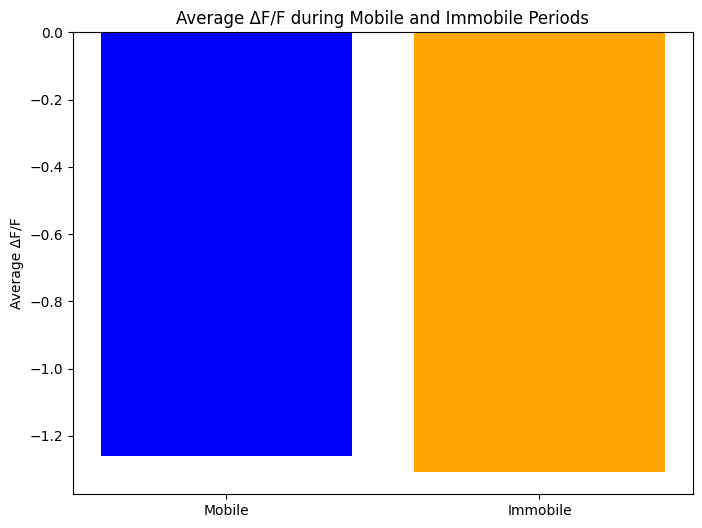

In [ ]:
#FOLD CHANGE (STILL IN THE WORKS)

# Load the mobility data
mobility_df = pd.read_csv('//gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/mobility.csv')

# Load the serotonin data
serotonin_df = pd.read_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/serotonin_df.csv')

import pandas as pd
import matplotlib.pyplot as plt


# Inspect the column names
print("Mobility Data Columns:", mobility_df.columns)
print("Serotonin Data Columns:", serotonin_df.columns)

# Rename columns to be consistent
mobility_df.rename(columns={'Unnamed: 0': 'Time (s)'}, inplace=True)
serotonin_df.rename(columns={'Z-score': 'df_f'}, inplace=True)

# Convert the Time (s) column in mobility_df to float to match serotonin_df
mobility_df['Time (s)'] = mobility_df['Time (s)'].astype(float)

# Round the time columns to a reasonable precision to match times
mobility_df['Time (s)'] = mobility_df['Time (s)'].round(3)
serotonin_df['Time (s)'] = serotonin_df['Time (s)'].round(3)

# Inspect the renamed columns
print("Renamed Mobility Data Columns:", mobility_df.columns)
print("Renamed Serotonin Data Columns:", serotonin_df.columns)

# Perform the nearest merge
merged_df = pd.merge_asof(mobility_df.sort_values('Time (s)'),
                          serotonin_df.sort_values('Time (s)'),
                          on='Time (s)', direction='nearest')

# Inspect the merged dataframe
print("Merged Data:")
print(merged_df.head())

# Calculate average ΔF/F for mobile periods
mobile_avg = merged_df[merged_df['mob'] == 0]['df_f'].mean()

# Calculate average ΔF/F for immobile periods
immobile_avg = merged_df[merged_df['mob'] == 1]['df_f'].mean()

# Print the averages
print(f"Average ΔF/F (Mobile): {mobile_avg}")
print(f"Average ΔF/F (Immobile): {immobile_avg}")

# Calculate the fold difference
fold_difference = mobile_avg / immobile_avg

# Print the fold difference
print(f"Fold Difference (Mobile / Immobile): {fold_difference}")

# Bar plot of averages
averages = [mobile_avg, immobile_avg]
labels = ['Mobile', 'Immobile']

plt.figure(figsize=(8, 6))
plt.bar(labels, averages, color=['blue', 'orange'])
plt.ylabel('Average ΔF/F')
plt.title('Average ΔF/F during Mobile and Immobile Periods')
plt.show()



In [ ]:


# Load the mobility and serotonin data for both control and PCB
import pandas as pd
import plotly.graph_objs as go
import kaleido


# Load the mobility and serotonin data for both control and PCB
control_mobility_df_nia11 = pd.read_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/mobility_control_jack.csv')
control_mobility_df_nia2 = pd.read_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/mobility_control_nia2.csv')
control_serotonin_df_nia11 = pd.read_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/serotonin_df_control_nia11.csv')
control_serotonin_df_nia2 = pd.read_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/serotonin_df_control_nia2.csv')
pcb_mobility_df_nia11 = pd.read_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/mobility_pcb_jack.csv')
pcb_mobility_df_nia2 = pd.read_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/mobility_pcb_nia2.csv')
pcb_serotonin_df_nia11 = pd.read_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/serotonin_df_pcb_nia11.csv')
pcb_serotonin_df_nia2 = pd.read_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/serotonin_df_pcb_nia2.csv')

# Round the 'Time (s)' values in serotonin_df to match the frame rate intervals in mob_df
control_serotonin_df_nia11['Time (s)'] = control_serotonin_df_nia11['Time (s)'].round(2)
control_serotonin_df_nia2['Time (s)'] = control_serotonin_df_nia2['Time (s)'].round(2)
pcb_serotonin_df_nia11['Time (s)'] = pcb_serotonin_df_nia11['Time (s)'].round(2)
pcb_serotonin_df_nia2['Time (s)'] = pcb_serotonin_df_nia2['Time (s)'].round(2)

# Merge the dataframes on the 'Time (s)' column
merged_control_df_nia11 = pd.merge(control_mobility_df_nia11, control_serotonin_df_nia11, on='Time (s)', how='inner')
merged_control_df_nia2 = pd.merge(control_mobility_df_nia2, control_serotonin_df_nia2, on='Time (s)', how='inner')
merged_pcb_df_nia11 = pd.merge(pcb_mobility_df_nia11, pcb_serotonin_df_nia11, on='Time (s)', how='inner')
merged_pcb_df_nia2 = pd.merge(pcb_mobility_df_nia2, pcb_serotonin_df_nia2, on='Time (s)', how='inner')

# Concatenate the merged dataframes for control and PCB
merged_control_df = pd.concat([merged_control_df_nia11, merged_control_df_nia2])
merged_pcb_df = pd.concat([merged_pcb_df_nia11, merged_pcb_df_nia2])
# Calculate the average serotonin level for mobile and immobile states for each mouse
average_serotonin_mobile_control_nia11 = merged_control_df_nia11[merged_control_df_nia11['mob'] == 0]['Z-score'].mean()
average_serotonin_immobile_control_nia11 = merged_control_df_nia11[merged_control_df_nia11['mob'] == 1]['Z-score'].mean()
average_serotonin_mobile_control_nia2 = merged_control_df_nia2[merged_control_df_nia2['mob'] == 0]['Z-score'].mean()
average_serotonin_immobile_control_nia2 = merged_control_df_nia2[merged_control_df_nia2['mob'] == 1]['Z-score'].mean()
average_serotonin_mobile_pcb_nia11 = merged_pcb_df_nia11[merged_pcb_df_nia11['mob'] == 0]['Z-score'].mean()
average_serotonin_immobile_pcb_nia11 = merged_pcb_df_nia11[merged_pcb_df_nia11['mob'] == 1]['Z-score'].mean()
average_serotonin_mobile_pcb_nia2 = merged_pcb_df_nia2[merged_pcb_df_nia2['mob'] == 0]['Z-score'].mean()
average_serotonin_immobile_pcb_nia2 = merged_pcb_df_nia2[merged_pcb_df_nia2['mob'] == 1]['Z-score'].mean()

# Calculate the overall averages
average_serotonin_mobile_control = (average_serotonin_mobile_control_nia11 + average_serotonin_mobile_control_nia2) / 2
average_serotonin_immobile_control = (average_serotonin_immobile_control_nia11 + average_serotonin_immobile_control_nia2) / 2
average_serotonin_mobile_pcb = (average_serotonin_mobile_pcb_nia11 + average_serotonin_mobile_pcb_nia2) / 2
average_serotonin_immobile_pcb = (average_serotonin_immobile_pcb_nia11 + average_serotonin_immobile_pcb_nia2) / 2

# Create data frames for the average serotonin levels
avg_serotonin_control = pd.DataFrame({
    'State': ['Mobile', 'Immobile'],
    'Average Serotonin Level': [average_serotonin_mobile_control, average_serotonin_immobile_control]
})

avg_serotonin_pcb = pd.DataFrame({
    'State': ['Mobile', 'Immobile'],
    'Average Serotonin Level': [average_serotonin_mobile_pcb, average_serotonin_immobile_pcb]
})
# Export the average serotonin level data frames to CSV files
avg_serotonin_control.to_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/average_serotonin_control.csv', index=False)
avg_serotonin_pcb.to_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/average_serotonin_pcb.csv', index=False)

# Export the merged data frames to CSV files
merged_control_df.to_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/merged_control.csv', index=False)
merged_pcb_df.to_csv('/gdrive/Shareddrives/Turi_lab/DeepLabCut/DLC_model_training/fiberphotometry/serotonin_fiberphotometry/merged_pcb.csv', index=False)

print("Data frames have been exported successfully.")

# Create the plots
fig_mobile = go.Figure()
# Add individual data points
# Add individual data points
fig_mobile.add_trace(go.Scatter(
    x=['Control', 'Control'],
    y=[average_serotonin_mobile_control_nia11, average_serotonin_mobile_control_nia2],
    mode='markers',
    name='Control Mouse Data',
    marker=dict(color='black', size=10)
))

fig_mobile.add_trace(go.Scatter(
    x=['PCB', 'PCB'],
    y=[average_serotonin_mobile_pcb_nia11, average_serotonin_mobile_pcb_nia2],
    mode='markers',
    name='PCB Mouse Data',
    marker=dict(color='black', size=10)
))

# Draw lines connecting the control and PCB points for each mouse
fig_mobile.add_trace(go.Scatter(
    x=['Control', 'PCB'],
    y=[average_serotonin_mobile_control_nia11, average_serotonin_mobile_pcb_nia11],
    mode='lines+markers',
    name='NIA11',
    line=dict(color='black', dash='dash'),
    marker=dict(size=10)
))

fig_mobile.add_trace(go.Scatter(
    x=['Control', 'PCB'],
    y=[average_serotonin_mobile_control_nia2, average_serotonin_mobile_pcb_nia2],
    mode='lines+markers',
    name='NIA2',
    line=dict(color='black', dash='solid'),
    marker=dict(size=10)
))
# Add control data
fig_mobile.add_trace(go.Bar(
    x=['Control', 'PCB'],
    y=[average_serotonin_mobile_control, average_serotonin_mobile_pcb],
    name='Mobile',
    marker_color=['blue', 'red']
))

fig_mobile.update_layout(
    title='Average Serotonin Level During Mobile States',
    xaxis_title='Condition',
    yaxis_title='Average Z-score (Serotonin)',
    showlegend=False
)

fig_mobile.show()

# Create the plots for immobile states
fig_immobile = go.Figure()

# Add immobile data
fig_immobile.add_trace(go.Bar(
    x=['Control', 'PCB'],
    y=[average_serotonin_immobile_control, average_serotonin_immobile_pcb],
    name='Immobile',
    marker_color=['blue', 'red']
))

# Add individual data points
fig_immobile.add_trace(go.Scatter(
    x=['Control', 'Control'],
    y=[average_serotonin_immobile_control_nia11, average_serotonin_immobile_control_nia2],
    mode='markers',
    name='Control Mouse Data',
    marker=dict(color='black', size=10)
))

fig_immobile.add_trace(go.Scatter(
    x=['PCB', 'PCB'],
    y=[average_serotonin_immobile_pcb_nia11, average_serotonin_immobile_pcb_nia2],
    mode='markers',
    name='PCB Mouse Data',
    marker=dict(color='black', size=10)
))

# Draw lines connecting the control and PCB points for each mouse
fig_immobile.add_trace(go.Scatter(
    x=['Control', 'PCB'],
    y=[average_serotonin_immobile_control_nia11, average_serotonin_immobile_pcb_nia11],
    mode='lines+markers',
    name='NIA11',
    line=dict(color='black', dash='dash'),
    marker=dict(size=10)
))

fig_immobile.add_trace(go.Scatter(
    x=['Control', 'PCB'],
    y=[average_serotonin_immobile_control_nia2, average_serotonin_immobile_pcb_nia2],
    mode='lines+markers',
    name='NIA2',
    line=dict(color='black', dash='solid'),
    marker=dict(size=10)
))

fig_immobile.update_layout(
    title='Average Serotonin Level During Immobile States',
    xaxis_title='Condition',
    yaxis_title='Average Z-score (Serotonin)',
    showlegend=False
)

fig_immobile.show()



# Save the mobile plot as a PNG file with 300 DPI resolution
fig_mobile.write_image('/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/drug_experiment-240625-124323/plots/mobile_plot.png', format='png', scale=3)

# Save the mobile plot as an SVG file
fig_mobile.write_image('/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/drug_experiment-240625-124323/plots/mobile_plot.svg', format='svg')

# Save the immobile plot as a PNG file with 300 DPI resolution
fig_immobile.write_image('/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/drug_experiment-240625-124323/plots/immobile_plot.png', format='png', scale=3)

# Save the immobile plot as an SVG file
fig_immobile.write_image('/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/drug_experiment-240625-124323/plots/immobile_plot.svg', format='svg')


Data frames have been exported successfully.
